In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# LINEAR REGRESSION

In simple terms, linear regression finds the best straight line that fits your data. This line is called the “regression line”. The equation of this line is usually written as **y = mx + c**, where:

- y is the dependent variable (in our case, the number of goals scored) <br>
- x is the independent variable (in our case, the number of hours practiced) <br>
- m is the slope of the line (how much y changes for each unit change in x) <br>
- c is the y-intercept (the value of y when x is 0)

In [106]:
df = pd.DataFrame({
    'Player': ['A','B','C','D','E'],
    'Hours Practiced per Week (x)': [5,10,15,20,25],
    'Goals Scored in a Season (y)': [9,14,22,40,50]
})

In [107]:
df

,Player,Hours Practiced per Week (x),Goals Scored in a Season (y)
0,A,5,9
1,B,10,14
2,C,15,22
3,D,20,40
4,E,25,50


In [108]:
lm = LinearRegression()
x = df[['Hours Practiced per Week (x)']]
y = df['Goals Scored in a Season (y)']

In [109]:
a = lm.fit(x,y)

In [110]:
a

LinearRegression()

In [111]:
Yhat=a.predict(x)
Yhat

array([ 5.4, 16.2, 27. , 37.8, 48.6])

In [9]:
a.intercept_

-5.400000000000006

In [10]:
a.coef_

array([2.16])

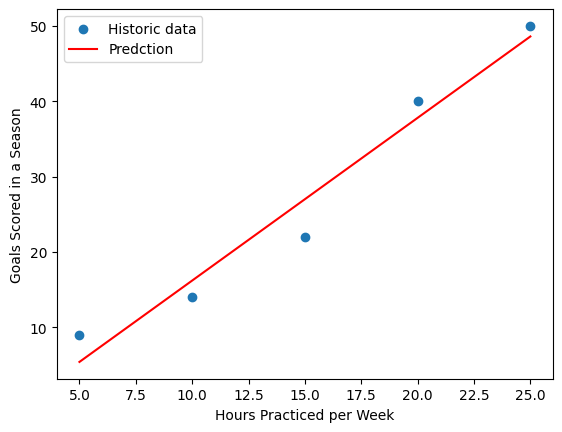

In [115]:
plt.scatter(x,y,label='Historic data')
plt.plot(x, Yhat, color='red', label='Predction')
plt.xlabel('Hours Practiced per Week')
plt.ylabel('Goals Scored in a Season')
plt.legend()

In [11]:
hours = pd.DataFrame({'Hours Practiced per Week (x)': [1,12,50,75]})
predicted_goals = lm.predict(hours)
print(predicted_goals)

[ -3.24  20.52 102.6  156.6 ]


In [12]:
df3 = pd.DataFrame({
    'Player': ['A','B','C','D','E'],
    'Hours Practiced per Week (x)': [5,10,15,20,25],
    'Goals Scored in a Season (y)': [10,20,30,40,50]
})

pred3 = lm.fit(df3[['Hours Practiced per Week (x)']],df3['Goals Scored in a Season (y)'])

# Predict hours
hours3 = pd.DataFrame({'Hours Practiced per Week (x)': [1,12,50,75]})
predicted_goals3 = pred3.predict(hours)
print(predicted_goals3)


[  2.  24. 100. 150.]


## DSA dataset

In [32]:
dsa_df = pd.read_csv(r'C:\Users\arthur.oliveira.PTCM-6597\OneDrive\Study\Python-Data-Science\Model Development\database\dataset.csv')

In [34]:
dsa_df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [35]:
dsa_df.head(5)

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [36]:
dsa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [37]:
dsa_df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [38]:
# Need a strong correlation between predictive variable (horas_estudo_mes in this case) and the target
dsa_df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

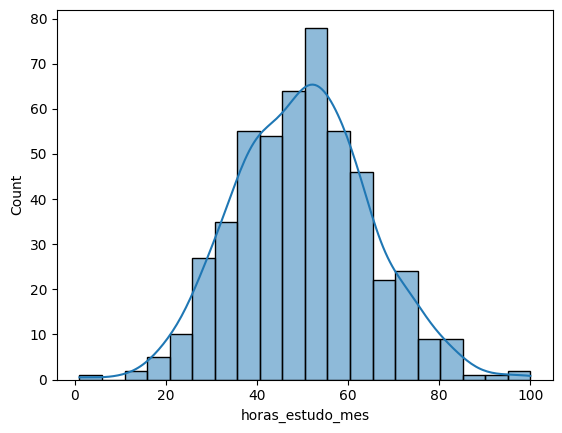

In [40]:
sns.histplot(data=dsa_df, x='horas_estudo_mes', kde=True)

In [43]:
X_DSA = dsa_df[['horas_estudo_mes']]

In [45]:
Y_DSA = dsa_df['salario']

In [ ]:
plt.scatter(X_DSA,Y_DSA, color='skyblue')
plt.xlabel('Horas de estudo mes')
plt.ylabel('Salario')
plt.show()

In [52]:
# SEPARATE TRAIN AND TEST DATA
X_DSA_TRAIN, X_DSA_TEST, Y_DSA_TRAIN, Y_DSA_TEST = train_test_split(X_DSA, Y_DSA, test_size=0.3, random_state=42)

In [66]:
# Create a simple linear regresssion model 
dsa_model = LinearRegression()

In [67]:
dsa_model.fit(X_DSA_TRAIN, Y_DSA_TRAIN)

LinearRegression()

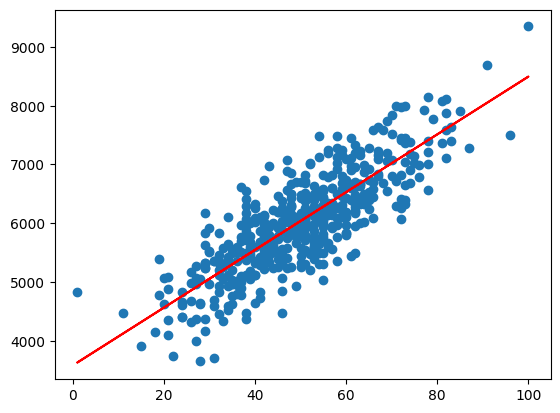

In [68]:
plt.scatter(X_DSA,Y_DSA, label='Historic data')
plt.plot(X_DSA, dsa_model.predict(X_DSA), color='red')


In [80]:
salary_pred_df = pd.DataFrame({
    'horas estudo': X_DSA['horas_estudo_mes'],
    'Valor aproximado': dsa_model.predict(X_DSA)})

In [84]:
salary_pred_df.sort_values(by='horas estudo')

,horas estudo,Valor aproximado
262,1.0,3631.385157
74,11.0,4122.585154
471,15.0,4319.065153
382,18.0,4466.425152
431,19.0,4515.545152
...,...,...
220,85.0,7757.465132
113,87.0,7855.705132
179,91.0,8052.185131
478,96.0,8297.785129


In [87]:

score = dsa_model.score(X_DSA_TEST,Y_DSA_TEST)
print(score.round(2))

0.57


In [88]:
# When the X in equation is 0
dsa_model.intercept_ 

3582.26515769166

In [89]:
# The slope
dsa_model.coef_

array([49.1199997])

In [99]:
dsa_target = np.array([[20]])
dsa_salary_predict = dsa_model.predict(dsa_target)

print(f'For {dsa_target} hour(s) study your salary should around: {dsa_salary_predict}')

For [[20]] hour(s) study your salary should around: [4564.66515175]


c:\Users\arthur.oliveira.PTCM-6597\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Multiple Linear Regression (MLR)

Multiple linear regression is an extension of linear regression into multiple dimensions. Instead of one independent variable, you have several.<br> The equation is **y = m1*x1 + m2*x2 + ... + mn*xn + c**. Each x represents a different factor, and each m represents how much that factor contributes to the outcome

In [13]:
df2 = pd.DataFrame({
    'Player': ['A','B','C','D','E'],
    'Hours Practiced per Week (x)': [5,10,15,20,25],
    'Goals Scored in a Season (y)': [9,14,22,40,50],
    'Years Playing (x2)': [1,2,4,5,6]
})

In [14]:
z = df2[['Hours Practiced per Week (x)','Years Playing (x2)']]

In [15]:
lm.fit(z, df2['Goals Scored in a Season (y)'])

LinearRegression()

In [16]:
# Predict the number of goals for players who practice different hours per week and have different years of experience
hours_year = pd.DataFrame({
    'Hours Practiced per Week (x)': [1,12,50,75,100],
    'Years Playing (x2)': [1,2,4,5,6]
})
predicted_goals2 = lm.predict(hours_year)
print(predicted_goals2)


[ -8.09333333  24.34666667 143.2        222.86666667 302.53333333]


# Model Evaluation - visualization

In [17]:
import seaborn as sns

In [29]:
df

,Player,Hours Practiced per Week (x),Goals Scored in a Season (y)
0,A,5,9
1,B,10,14
2,C,15,22
3,D,20,40
4,E,25,50


(0.0, 55.31999999999999)

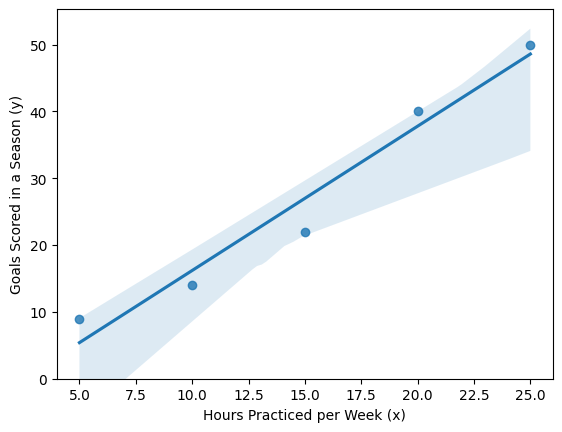

In [23]:
sns.regplot(data = df, x='Hours Practiced per Week (x)', y='Goals Scored in a Season (y)' )
plt.ylim(0,)

[]

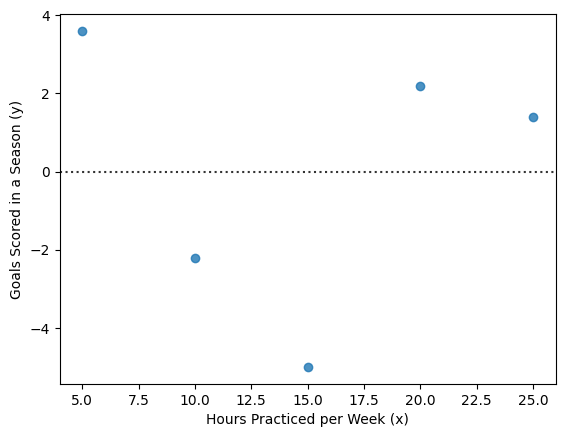

In [28]:
sns.residplot(data = df, x='Hours Practiced per Week (x)', y='Goals Scored in a Season (y)')
plt.plot()